### AED - Analise Exploratoria de Dados

Instalando serviços necessários.


In [1]:
!pip install pyodbc
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Importando pyodbc e buscando o drive do banco de dados que vai ser conectado.

In [2]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

Importanto mensagens de erro e bibliotecas.

In [3]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x:'%.2f' % x)


Conectando com o banco de dados.


In [4]:
conn = pyodbc.connect(Trusted_connection='Yes',
                      DRIVER = '{ODBC Driver 17 for SQL Server}',
                      SERVER = 'DESKTOP-IL42DTP',
                      DATABASE = 'armazemdedados')
                      
cursor = conn.cursor

Consultando tabelas no SQL Server

In [5]:
SQL_Query = pd.read_sql_query('select * FROM fato_vendas', conn)
fato_vendas = pd.DataFrame(SQL_Query)

In [6]:
fato_vendas

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,QuantidadeVenda,ValorUnitarioVenda,ValorTotalVenda,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado
0,1,2022-04-01,1,1,4000,0.34,1360.00,1,1,1,0
1,2,2022-04-02,2,2,1000,0.50,500.00,2,1,1,0
2,3,2022-04-03,3,3,2000,0.80,1600.00,3,2,3,0
3,4,2022-04-04,4,4,3000,0.90,2700.00,4,1,1,0
4,5,2022-04-05,5,5,4000,0.40,1600.00,5,2,2,0
5,6,2022-04-06,6,6,4000,1.00,4000.00,6,1,1,0
6,7,2022-04-07,7,7,2000,0.70,1400.00,7,1,1,0
7,8,2022-04-08,8,8,1000,0.35,350.00,8,2,1,0
8,9,2022-04-09,9,9,5000,0.80,4000.00,9,1,1,0
9,10,2022-04-10,10,10,1000,0.52,520.00,10,2,1,0


In [7]:
SQL_Query = pd.read_sql_query('select * FROM dim_produto', conn)
dim_produto = pd.DataFrame(SQL_Query)

In [8]:
dim_produto

,CodigoProduto,NomeProduto,TipoProduto,UnidadeProduto,SaldoProduto,StatusProduto
0,1,Produto A,A,KG,20000,Ativo
1,2,Produto N,B,KG,10000,Ativo
2,3,Produto F,C,KG,20000,Ativo
3,4,Produto S,A,KG,20000,Ativo
4,5,Produto W,C,KG,30000,Ativo
5,6,Produto U,B,KG,10000,Ativo
6,7,Produto Z,X,KG,20000,Ativo
7,8,Produto L,Q,KG,20000,Ativo
8,9,Produto O,A,KG,10000,Ativo
9,10,Produto I,X,KG,15000,Ativo


In [9]:
SQL_Query = pd.read_sql_query('select * FROM dim_cliente', conn)
dim_cliente = pd.DataFrame(SQL_Query)

In [10]:
dim_cliente

,CodigoCliente,NomeCliente,IdadeCliente,ClassificacaoCliente,SexoCliente,CidadeCliente,EstadoCliente,PaisCliente
0,1,Cliente A,20,2,M,Tianguá,Ceará,Brasil
1,2,Cliente B,25,2,M,Sobral,Ceará,Brasil
2,3,Cliente C,23,2,F,Brasília,Distrito Federal,Brasil
3,4,Cliente D,24,2,M,São Paulo,São Paulo,Brasil
4,5,Cliente E,28,2,M,Rio Branco,Acre,Brasil
5,6,Cliente F,30,2,F,Rio de Janeiro,Rio de Janeiro,Brasil
6,7,Cliente G,21,2,F,Fortaleza,Ceará,Brasil
7,8,Cliente H,49,2,F,Ipú,Ceará,Brasil
8,9,Cliente I,52,2,M,Sobral,Ceará,Brasil
9,10,Cliente J,30,2,F,Palmas,Tocantins,Brasil


In [11]:
sql = """
        SELECT *
        FROM fato_vendas ven
        LEFT JOIN dim_produto pro ON pro.CodigoProduto = ven.CodigoProduto;
      """
pd.read_sql(sql, conn)

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,QuantidadeVenda,ValorUnitarioVenda,ValorTotalVenda,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado,CodigoProduto,NomeProduto,TipoProduto,UnidadeProduto,SaldoProduto,StatusProduto
0,1,2022-04-01,1,1,4000,0.34,1360.00,1,1,1,0,1,Produto A,A,KG,20000,Ativo
1,2,2022-04-02,2,2,1000,0.50,500.00,2,1,1,0,2,Produto N,B,KG,10000,Ativo
2,3,2022-04-03,3,3,2000,0.80,1600.00,3,2,3,0,3,Produto F,C,KG,20000,Ativo
3,4,2022-04-04,4,4,3000,0.90,2700.00,4,1,1,0,4,Produto S,A,KG,20000,Ativo
4,5,2022-04-05,5,5,4000,0.40,1600.00,5,2,2,0,5,Produto W,C,KG,30000,Ativo
5,6,2022-04-06,6,6,4000,1.00,4000.00,6,1,1,0,6,Produto U,B,KG,10000,Ativo
6,7,2022-04-07,7,7,2000,0.70,1400.00,7,1,1,0,7,Produto Z,X,KG,20000,Ativo
7,8,2022-04-08,8,8,1000,0.35,350.00,8,2,1,0,8,Produto L,Q,KG,20000,Ativo
8,9,2022-04-09,9,9,5000,0.80,4000.00,9,1,1,0,9,Produto O,A,KG,10000,Ativo
9,10,2022-04-10,10,10,1000,0.52,520.00,10,2,1,0,10,Produto I,X,KG,15000,Ativo


In [12]:
# USANDO WINDOW FUNCTION
sqlwf = """
        SELECT codigocliente,
        year(DataVenda) AS ano,
        codigoProduto,
        QuantidadeVenda,
        SUM(QuantidadeVenda) OVER(PARTITION BY codigocliente)       AS quantidade_por_cliente,
        SUM(QuantidadeVenda) OVER(PARTITION BY codigocliente, year(DataVenda)) AS quantidade_por_cliente_ano
        FROM fato_vendas
        ORDER BY codigocliente, year(DataVenda), QuantidadeVenda;
        """
pd.read_sql(sqlwf, conn)

,codigocliente,ano,codigoProduto,QuantidadeVenda,quantidade_por_cliente,quantidade_por_cliente_ano
0,1,2022,1,4000,4000,4000
1,2,2022,2,1000,1000,1000
2,3,2022,3,2000,2000,2000
3,4,2022,4,3000,3000,3000
4,5,2022,5,4000,4000,4000
5,6,2022,6,4000,4000,4000
6,7,2022,7,2000,2000,2000
7,8,2022,8,1000,1000,1000
8,9,2022,9,5000,5000,5000
9,10,2022,10,1000,1000,1000


In [13]:
# Relação entre idade e quantidade comprada
sql1 = """
        SELECT v.*,
              c.NomeCliente,
              c.IdadeCliente    AS  Idade,
              c.ClassificacaoCliente    AS  Classificacao,
              c.SexoCliente     AS  Sexo,
              c.CidadeCliente   AS  Cidade,
              c.EstadoCliente   AS  Estado,
              PaisCliente       AS  Pais
        FROM fato_vendas v
        JOIN dim_cliente c ON c.codigocliente = v.CodigoCliente;
       """
SQL_Query = pd.read_sql(sql1, conn)
IdadeQuantidade = pd.DataFrame(SQL_Query)


In [14]:
IdadeQuantidade

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,QuantidadeVenda,ValorUnitarioVenda,ValorTotalVenda,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado,NomeCliente,Idade,Classificacao,Sexo,Cidade,Estado,Pais
0,1,2022-04-01,1,1,4000,0.34,1360.00,1,1,1,0,Cliente A,20,2,M,Tianguá,Ceará,Brasil
1,2,2022-04-02,2,2,1000,0.50,500.00,2,1,1,0,Cliente B,25,2,M,Sobral,Ceará,Brasil
2,3,2022-04-03,3,3,2000,0.80,1600.00,3,2,3,0,Cliente C,23,2,F,Brasília,Distrito Federal,Brasil
3,4,2022-04-04,4,4,3000,0.90,2700.00,4,1,1,0,Cliente D,24,2,M,São Paulo,São Paulo,Brasil
4,5,2022-04-05,5,5,4000,0.40,1600.00,5,2,2,0,Cliente E,28,2,M,Rio Branco,Acre,Brasil
5,6,2022-04-06,6,6,4000,1.00,4000.00,6,1,1,0,Cliente F,30,2,F,Rio de Janeiro,Rio de Janeiro,Brasil
6,7,2022-04-07,7,7,2000,0.70,1400.00,7,1,1,0,Cliente G,21,2,F,Fortaleza,Ceará,Brasil
7,8,2022-04-08,8,8,1000,0.35,350.00,8,2,1,0,Cliente H,49,2,F,Ipú,Ceará,Brasil
8,9,2022-04-09,9,9,5000,0.80,4000.00,9,1,1,0,Cliente I,52,2,M,Sobral,Ceará,Brasil
9,10,2022-04-10,10,10,1000,0.52,520.00,10,2,1,0,Cliente J,30,2,F,Palmas,Tocantins,Brasil


Escolher melhor Cluster.

In [15]:
X2 = IdadeQuantidade[['QuantidadeVenda' , 'Classificacao']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_) 

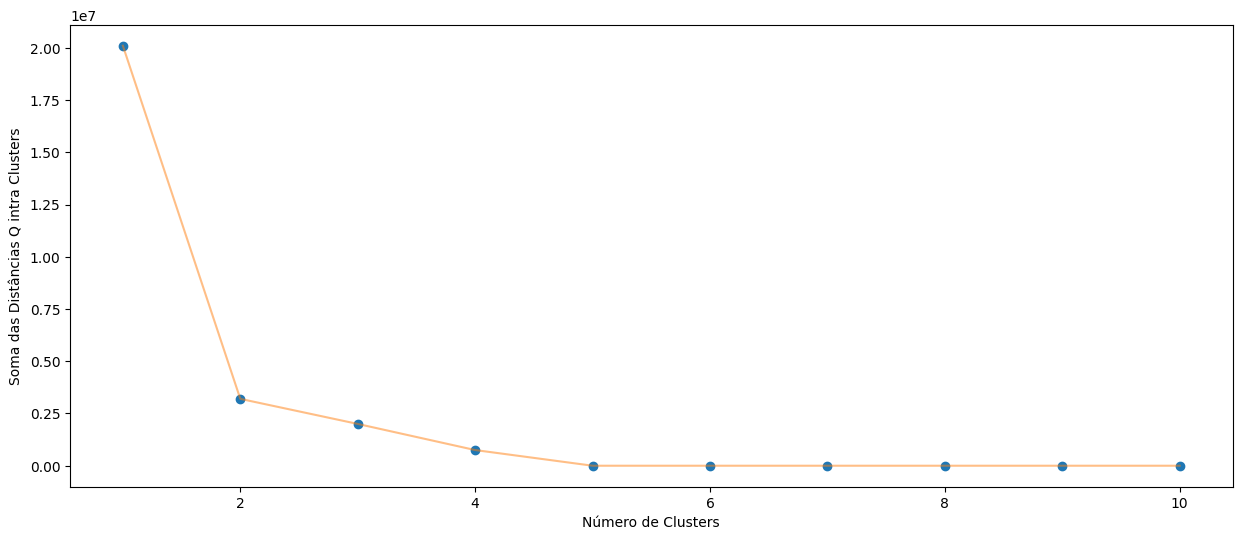

In [16]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , "o")
plt.plot(np.arange(1 , 11) , inertia , "-" , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Inicializando e computando o KMeans com valor de 2 clusters.

In [17]:
algorithm = (KMeans(n_clusters = 2))
algorithm.fit(X2)

KMeans(n_clusters=2)

In [18]:
# Visualisando os dados agrupados
IdadeQuantidade["clusters"] = algorithm.labels_

In [19]:
IdadeQuantidade

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,QuantidadeVenda,ValorUnitarioVenda,ValorTotalVenda,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado,NomeCliente,Idade,Classificacao,Sexo,Cidade,Estado,Pais,clusters
0,1,2022-04-01,1,1,4000,0.34,1360.00,1,1,1,0,Cliente A,20,2,M,Tianguá,Ceará,Brasil,1
1,2,2022-04-02,2,2,1000,0.50,500.00,2,1,1,0,Cliente B,25,2,M,Sobral,Ceará,Brasil,0
2,3,2022-04-03,3,3,2000,0.80,1600.00,3,2,3,0,Cliente C,23,2,F,Brasília,Distrito Federal,Brasil,0
3,4,2022-04-04,4,4,3000,0.90,2700.00,4,1,1,0,Cliente D,24,2,M,São Paulo,São Paulo,Brasil,1
4,5,2022-04-05,5,5,4000,0.40,1600.00,5,2,2,0,Cliente E,28,2,M,Rio Branco,Acre,Brasil,1
5,6,2022-04-06,6,6,4000,1.00,4000.00,6,1,1,0,Cliente F,30,2,F,Rio de Janeiro,Rio de Janeiro,Brasil,1
6,7,2022-04-07,7,7,2000,0.70,1400.00,7,1,1,0,Cliente G,21,2,F,Fortaleza,Ceará,Brasil,0
7,8,2022-04-08,8,8,1000,0.35,350.00,8,2,1,0,Cliente H,49,2,F,Ipú,Ceará,Brasil,0
8,9,2022-04-09,9,9,5000,0.80,4000.00,9,1,1,0,Cliente I,52,2,M,Sobral,Ceará,Brasil,1
9,10,2022-04-10,10,10,1000,0.52,520.00,10,2,1,0,Cliente J,30,2,F,Palmas,Tocantins,Brasil,0


In [20]:
df_group = IdadeQuantidade.drop(['CodigoVenda','DataVenda','CodigoCliente','CodigoProduto','ValorUnitarioVenda','ValorTotalVenda','CodigoVendedor','CodigoCanalVendas','CodigoStatus','Deletado','Idade','Classificacao'],axis=1)

In [21]:
#Disposição das quantidade de Vendas nos clusters
df_group.describe()

,QuantidadeVenda,clusters
count,10.00,10.00
mean,2700.00,0.50
std,1494.43,0.53
min,1000.00,0.00
25%,1250.00,0.00
50%,2500.00,0.50
75%,4000.00,1.00
max,5000.00,1.00
